In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
import os
from itertools import cycle, islice
import copy

In [3]:
cp1_path = '/home/diya/Documents/rat-fes/data/filipe_data/N5/N5_171001_No Obstacles_s.mat'
cp2_path = '/home/diya/Documents/rat-fes/data/filipe_data/N6/N6_171204_No Obstacles_s.mat'
cp3_path = '/home/diya/Documents/rat-fes/data/filipe_data/N9/N9_171204_No Obstacles_s.mat'

cp1 = CortProcessor(cp1_path)
cp2 = CortProcessor(cp2_path)
cp3 = CortProcessor(cp3_path)

this is filipe data i belive
this is filipe data i belive
this is filipe data i belive


In [4]:
nada, vaffy, nadas, naadax = cp1.decode_angles()
print(np.average(vaffy, 1)[1])

0.7889999999999999


In [5]:
cp1_channels = cp1.data['which_channels']
cp2_channels = cp2.data['which_channels']
cp3_channels = cp3.data['which_channels']

In [6]:
cp_list = [cp1, cp2, cp3]

In [7]:
new_rates = {}
new_rates[0] = []
new_rates[1] = []
new_rates[2] = []

In [8]:
for i in range(1, 33):
    if i in cp1_channels:
        if i in cp2_channels:
            if i in cp3_channels:
                for k in range(len(cp_list)):
                    idx = cp_list[k].data['which_channels'].index(i)
                    new_rates[k].append(cp_list[k].data['rates'][0][:,idx])

In [9]:
cp1_rates = np.array(new_rates[0])
cp2_rates = np.array(new_rates[1])
cp3_rates = np.array(new_rates[2])

In [10]:
cp1_rates = cp1_rates.T
cp2_rates = cp2_rates.T
cp3_rates = cp3_rates.T

In [11]:
cp1.data['rates'] = [cp1_rates]
cp2.data['rates'] = [cp2_rates]
cp3.data['rates'] = [cp3_rates]

In [12]:
with open('/home/diya/Documents/rat-fes/data/pickles/N5_mixed.pkl', 'wb') as inp: #YOUR PATH HERE
    pickle.dump(cp1, inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N6_mixed.pkl', 'wb') as inp: #YOUR PATH HERE
    pickle.dump(cp2, inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N9_mixed.pkl', 'wb') as inp: #YOUR PATH HERE
    pickle.dump(cp3, inp)

In [3]:
my_cca = CCAProcessor(cp1, cp2)

(12050,)
(12051,)
should be good to align
(9543, 11)
(9543, 5)
(9543, 23)
(9543, 5)


In [4]:
x = cp1.data['rates'][0]
y = cp1.data['angles'][0]
             
x_format, y_format = format_data(x, y)
             
x2 = my_cca.remove_cp2_channels()
y2 = cp2.data['angles'][0]
             
x2_format, y2_format = format_data(x2, y2)

In [5]:
clf = LinearRegression()
clf.fit(x_format, y_format)
predic = clf.predict(x_format)

In [6]:
predic2 = clf.predict(x2_format)

In [7]:
predic.shape

(12040, 5)

In [8]:
vaf(y_format[:,1], predic[:,1])

0.57

In [9]:
vaf(y2_format[:,1], predic2[:,1])

0.42

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
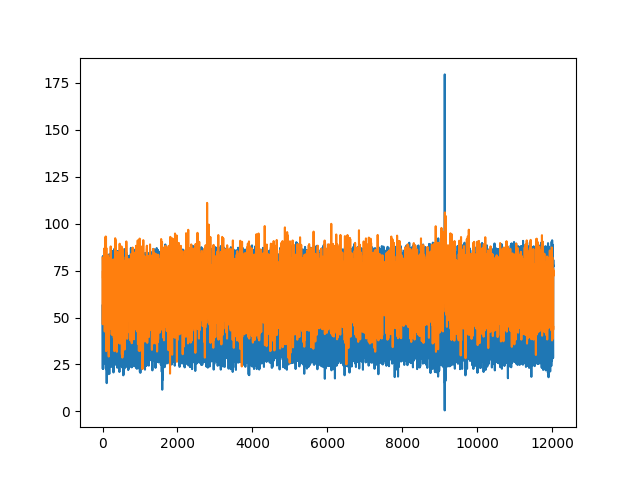

In [10]:
fig, ax = plt.subplots()
ax.plot(y2_format[:,1])
ax.plot(predic2[:,1])

In [11]:
love.shape

NameError: name 'love' is not defined

In [117]:
cp2.data['rates'][0].shape

(12051, 23)

In [98]:
a = cp1.data['which_channels']

In [97]:
b = cp2.data['which_channels']

In [106]:
for channel in a:
    if channel not in b:
        print(channel)

3


In [109]:
len(b)

23

In [96]:
cp2.data['rates'][0].shape

(12051, 23)

In [59]:
angles = cp1.data['angles'][0]
rates = cp1.data['rates'][0]

In [67]:
cp1.handler['which_channels']

[2,
 7,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 23,
 24,
 25,
 26,
 28,
 29,
 31,
 0,
 1,
 5,
 7,
 9,
 10,
 11,
 13,
 14,
 15,
 16]

In [61]:
cp1.data['original_rates']

KeyError: 'original_rates'

In [60]:
rates.shape

(12050, 11)

In [55]:
clf = LinearRegression()
clf.fit(rates, angles)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [50]:
np.nan

nan

In [17]:

which_channels

array([ 2,  7,  9, 10, 12, 13, 14, 15, 16, 17, 23, 24, 25, 26, 28, 29, 31],
      dtype=uint8)

In [24]:
for idx in range(uncut_rates.shape[1]):
    if idx in which_channels:
        position = np.where(which_channels==idx)[0][0]
        
    
    

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([0]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([1]),)
(array([], dtype=int64),)
(array([2]),)
(array([3]),)
(array([], dtype=int64),)
(array([4]),)
(array([5]),)
(array([6]),)
(array([7]),)
(array([8]),)
(array([9]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([10]),)
(array([11]),)
(array([12]),)
(array([13]),)
(array([], dtype=int64),)
(array([14]),)
(array([15]),)
(array([], dtype=int64),)
(array([16]),)


In [19]:
uncut_rates = np.zeros((100,32))

In [22]:
uncut_rates.shape

(100, 32)

In [32]:
test = np.where(which_channels==0)

In [44]:
love = 2

In [42]:
love in which_channels

False

In [47]:
np.where(which_channels==love)[0][0]

0